In [8]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# 第五章 图像分类

先来个数据集

In [9]:
path = untar_data(URLs.PETS)
Path.BASE_PATH=path
path.ls()

(#2) [Path('annotations'),Path('images')]

再说件重要的事情，大部分的fastai库中的函数都不会返回一个python列表，而是返回一个叫“L”的类，基本可以被认为是一个增强型的 list类型，主要是加了一些操作

In [10]:
#(path/"images").ls()
fname = (path/"images").ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [11]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

最下面两行代码做的是一件叫persizing的工作，首先是将一张图片的内容里面截出固定大小的图片，比如460*460，第二步就是将这个得到的结果做一些旋转，拉伸和缩放，最后再转化成一个标准的矩形，这在CV中是挺重要的一个数据预处理的方式

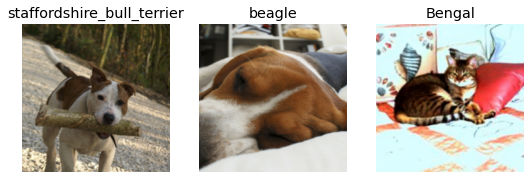

In [12]:
dls.show_batch(nrows=1, ncols=3)

如果调用summary函数的话就可以看到具体的处理信息，是一个非常好用的调试工具

In [13]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\94323\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\94323\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30, dtype=torch.int32)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30, dtype=torch.int32))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {

RuntimeError: stack expects each tensor to be equal size, but got [3, 375, 500] at entry 0 and [3, 199, 300] at entry 1